<a href="https://colab.research.google.com/github/JuanM-GG/sistemas-dinamicos-Python/blob/main/EXERCISE_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Title: Exercise 2.2 

Author: Juan Manuel G.G

Date: February 2021

### 1. Process description

A completely stirred-tank heating process is used to heat an incoming stream whose flow rate varies. The heating rate from this coil and the volume are both constant. Heat losses to the ambient occur and the ambient temperature (Ta) and the incoming stream's temperature can both vary  

### 2. Assumptions 

* Constant density 
* Constant Cp
* U, the overall heat transfer coefficient, is constant 

### 3. Scheme of the process 

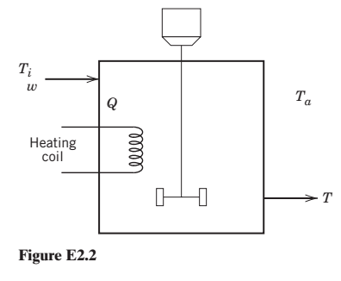

### 4. Analysis

#### Establish the model 

Energy balance 

$$\frac{dH}{dt} = w(\hat{H}_i - \hat{H}) + Q - UA_s(T-Ta)$$

$$
C_p \rho V\frac{dT}{dt} = wC_p(T_i - T) + Q - UA_s(T-Ta) \tag{1}
$$

#### Degrees of freedom analysis

State variables: T (1)
Equations: 1 DE (1)
Degrees of freedom: 1 - 1 = 0
Inputs: w, Ti, Q, Ta 
Parameters: Cp, $\rho$, As, U


#### Steady state 

Equating (1) to zero we get 

$$
wC_p(T_i - T) + Q - UA_s(T-T_a) = 0
$$

$$
T = \frac{wC_pT_i + Q + UA_s T_a}{wC_p + UA_s} \tag{2}
$$

In [4]:
import sympy as sp

In [5]:
w, Cp, Ti, T, Q, UAs, Ta = sp.symbols("w, Cp, Ti, T, Q, UAs, Ta")

In [6]:
eq = sp.Eq(w*Cp*(Ti-T)+Q-UAs*(T-Ta), 0)

In [7]:
sp.solve(eq,T)

[(Cp*Ti*w + Q + Ta*UAs)/(Cp*w + UAs)]

#### Simulation 

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint 

In [15]:
# establish the model 
def heater(s,t,p,u):

    # state variables 
    T = s[0]

    # input variables
    w = u[0]
    Ti = u[1]
    Q = u[2]
    Ta = u[3]

    # parameters 
    Cp = p[0]
    rho = p[1]
    UAs = p[2]
    V = p[3]

    # energy balance
    dTdt = 1/(Cp*rho*V)*(w*Cp*(Ti-T) + Q - UAs*(T-Ta))

    return dTdt

In [28]:
# establish parameters
p = [4186, 1000, 500, 10]

# establish inputs
u = [10, 320,150,280]

# establish initial conditions 
s = [200]

# set integration time 
time = np.linspace(0,5000,100)

In [29]:
# solve ODEs
out = odeint(heater, s, time, args=(p,u))

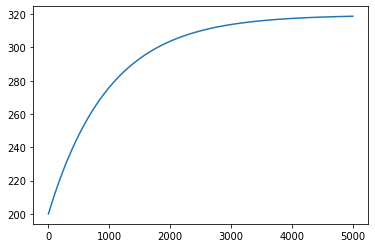

In [30]:
plt.plot(time,out)

In [31]:
def steady_state(p,u):

    # input variables
    w = u[0]
    Ti = u[1]
    Q = u[2]
    Ta = u[3]

    # parameters 
    Cp = p[0]
    UAs = p[2]

    T = (w*Cp*Ti + Q + UAs*Ta)/(w*Cp + UAs)

    return T

In [32]:
steady_state(p,u)

319.53139754485363

What happend if Ti change during the simulation 

What happend if w variaes during the simulation 

In [80]:
# variable inputs
w = np.ones(len(time))*10
w[50:75] = 50
Ti = np.ones(len(time))*320
#Ti[50:75] = 400

In [81]:
# vectors to save state 
T = np.ones(len(time))*200
# establish initial conditions 
s = [200]

In [82]:
for i in range(len(time)-1):
    # update time 
    ts = [time[i], time[i+1]]
    # update w
    u[0] = w[i+1]
    #update Ti
    u[1] = Ti[i+1]
    # simulate the model 
    out = odeint(heater, s, ts, args = (p,u))
    # save results 
    T[i+1] = out[-1][0]
    # update initial conditions 
    s = out[-1][0]

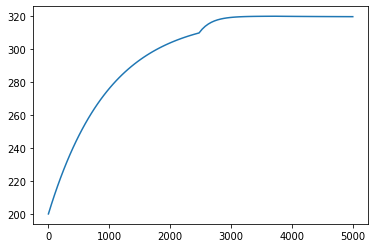

In [83]:
plt.plot(time, T)

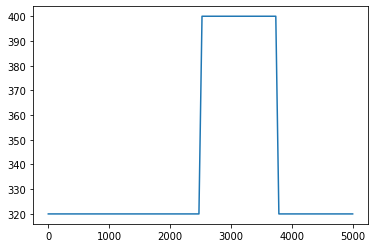

In [79]:
plt.plot(time, Ti)